In [332]:
import matplotlib.pyplot as plt
import networkx as nx

class Node:
    """
    Node class
    """
    def __init__(self,val): #this is initializing the class!
        self.val = val
        self.edges = []
    
    def __eq__(self,other): #equal method
        return self.val == other.val

    def __hash__(self): #hashing keys makes the accessign quicker!
        return hash(self.val)

class G:
    def __init__(self, nodes = []):
        self.nodes = nodes
        self.visual = []

    def add_node(self,val):
        new_node = Node(val)
        self.nodes.append(new_node)

    def add_edge(self,node1,node2):
        node1.edges.append(node2)
        node2.edges.append(node1)
        self.visual.append([node1.val, node2.val])

    def create_graph(self, graph_dict):
        for node in graph_dict.keys():
            new_node = Node(node)
            self.nodes.append(new_node)
        for node in self.nodes:
            for edge in graph_dict[node.val]:
                node.edges.append(self.nodes[edge])
                self.nodes[edge].edges.append(node)
                self.visual.append([node.val, self.nodes[edge].val])
    def print_graph(self):
        for node in self.nodes:
            print('Node Vale:' , node.val)
            for edge in node.edges:
                print("\tEdge value:", edge.val)

    def visualize(self):
        G = nx.Graph()
        G.add_edges_from(self.visual)
        nx.draw_networkx(G)
        plt.show()   
    
class Traversal(G):
    def __init__(self):
        # G.__init__(self)
        #super(Traversal,self).__init__()
        super().__init__()
        
    def findnode(self,alphabet):
        for node in self.nodes:
            if node.val == alphabet:
                break
        return node

    def bfs(self):
        frontier_bfs = [self.nodes[0]]
        explored_bfs = [self.nodes[0]]
        while frontier_bfs:         
            current_node = frontier_bfs.pop(0)
            print(current_node.val,end=" ")
            neighbors = current_node.edges
            for node in neighbors:
                if node not in explored_bfs:
                    explored_bfs.append(node)
                    frontier_bfs.append(node)
        return        

    def dfs(self):
        frontier_dfs = [self.nodes[0]]
        explored_dfs = [self.nodes[0]]
        while frontier_dfs:         
            current_node = frontier_dfs.pop()
            print(current_node.val,end=" ")
            neighbors = current_node.edges
            for node in neighbors:
                if node not in explored_dfs:
                    explored_dfs.append(node)
                    frontier_dfs.append(node)
        return        

    def all_paths(self,start,goal):
        start=self.findnode(start)
        goal =self.findnode(goal)
        
        frontier = [[start]]
        paths_list = []
        while frontier:
            current_path = frontier.pop(0)

            if current_path[-1] == goal:
                paths_list.append(current_path)      
                continue
            
            neighbors = current_path[-1].edges
            for node in neighbors: 
                if node not in current_path:
                    new_path = current_path.copy()
                    new_path.append(node)
                    frontier.append(new_path)  
        
        #printing all paths:
        printed_path = []
        for path in paths_list:
            if path not in printed_path:
                printed_path.append(path)            
                for node in path:
                    print(node.val, end = "->")
                print()

        return   
        
        
    def shortest_path(self, start, goal):
        start=self.findnode(start)
        goal =self.findnode(goal)

        frontier = [start]
        explored = [start]
        pred = {}
        distance = {}
        distance[start] = 0
        flag = True
        while frontier and flag:
            current_node = frontier.pop(0)
            neighbors = current_node.edges

            for node in neighbors:
                if node not in explored:
                    explored.append(node)
                    frontier.append(node)
                    distance[node] = distance[current_node] + 1
                    pred[node] = current_node
                if node == goal:
                    flag = False
                    break
        if flag:
            print("goal is not linked to the start")
            return -1

        #print the shortest path
        c = goal
        path = []

        while c!= start:
            path.append(c)
            c = pred[c]
        path.append(start)
        path = path[::-1]

        print("length of the shortest path: ",distance[goal])
        for node in path:
            print(node.val, end=" ")  
        return   

In [333]:
graph_dict = {'A': [1, 2],
               'B': [3, 4],
               'C': [5],
               'D': [11],
               'E': [5],
               'F': [6, 10],
               'G': [8],
               'H': [10],
               'I': [12],
               'J': [7],
               'K': [9],
               'L': [1],
               'M': [2]
               }
g2 = Traversal()
g2.create_graph(graph_dict)

In [334]:
g2.shortest_path('J','L')

length of the shortest path:  5
J K F E B L 

In [335]:
g2.all_paths('A','B')

A->B->
A->C->F->E->B->
A->C->M->I->G->F->E->B->


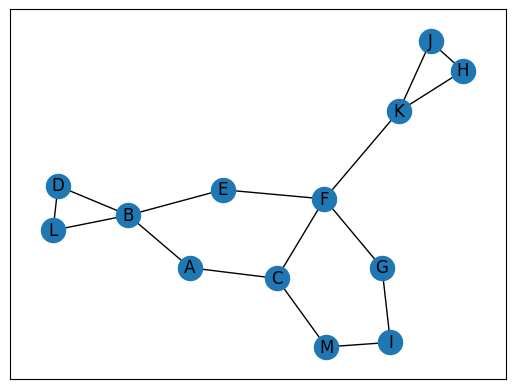

In [293]:
g2.visualize()

In [328]:
graph_dict2 = {'A': [1, 2],
              'B': [2, 3],
              'C': [3],
              'D': [1],
              }

In [329]:
g3 = Traversal()
g3.create_graph(graph_dict2)

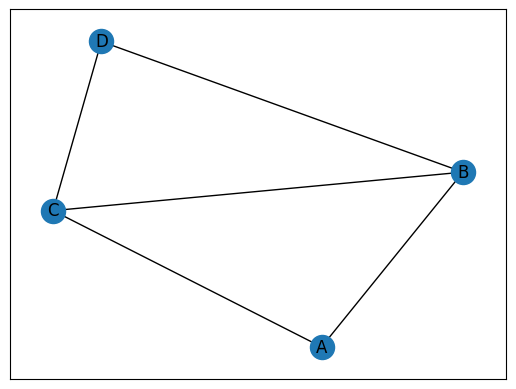

In [330]:
g3.visualize()

In [331]:
g3.all_paths('A','D')

A->B->D->
A->C->D->
A->B->C->D->
A->C->B->D->
